## pandas



This section provides a brief introduction to pandas. The pandas library is a key component for doing data science in Python for a couple of reasons. Most importantly, it provides two data types, series and data frame, that allow you to store and manipulate data in a way that is useful for analysis. Second, it is incredibly useful for importing and exporting data in a wide variety of formats. Finally, it makes descriptive analysis, including both summary statistics and visualizations. This section provides an introduction to the main capabilities of pandas relevant to data analysis. 

Most of the things that you will want to do it Python require importing libraries. convention, pandas is imported as `pd`. Additionally, we enable the ability for pandas graphics to be displayed within the notebook with `%matplotlib inline`. 

In [1]:
import pandas as pd

### Reading data

In the summer of 2017, the Washington Post produced a [report](https://www.washingtonpost.com/graphics/2018/investigations/unsolved-homicide-database/) on murder clearance rates by cities. The also released the [data](https://github.com/washingtonpost/data-homicides) they collected on Github as a csv file. We can create a new dataframe, called `df`, using the [pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) `read_csv` method.  

In [2]:
df = pd.read_csv('data/homicide.csv')

By default, `read_csv` assumes a comma separator, but this could be customized by adding the  `sep=` parameter. So a pipe-delimited version of the file could be read with:

~~~python
df = pd.read_csv('data/homicide.psv', sep='|')
~~~

Additionally, read_csv can access file directly from the web.

```python
csv_url = 'https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv'

df = pd.read_csv(csv_url)
```

Text files may also include special characters, such as 😎 which can be written as `\U0001f60e`

In [5]:
print('\U0001f60e')

😎


In this case, you might need to set the encoding parameter. With most CSV, files, unfortunately, this is usually a process of trial and error:

In [6]:
csv_url = 'https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv'

df = pd.read_csv(csv_url)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [7]:
df = pd.read_csv(csv_url, encoding='iso-8859-1')

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In this case, the csv file was not encoding in utf-8, but `iso-8859-1`, also know as `latin1`. According to [someone one the intenet](https://w3techs.com/technologies/overview/character_encoding/all), the most frequently used encodings on the web are:

1. UTF-8 (92% of web pages) - Default for Python 3.x
2. ISO-8859-1 (4%) (`encoding = iso-8859-1` or `encoding = latin1`)
3. Windows-1251 (1%) - Used for Cyrillic script (`encoding = windows-1251`)
4. Windows-1252 (<1%) - Old fork of ISO-8859-1 (`encoding = windows-1252`)
3. Shift JIS (<1%) - Japanese characters  (`encoding = shift-jis`)

You might need to Google around for other langauage specific encodings.

#### Learning about your dataframe

After loading a dataframe, best practice is to get a sense of the data with the `head`, `info` and `describe` methods. `head` shows the first five rows of the dataframe.

In [8]:
df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In addition to the data in the csv file, an index has been created to identifiy each row. By default, this is an interger starting with 0. 

If the dataset is wide, middle columns will not be displayed. Also, if text fields are long, only the first few characters will be shown. These can both be adjusted using pandas [display settings](https://pandas.pydata.org/pandas-docs/stable/options.html). 

`info` can be used to explore the data types and the number of non-missing cases for each variable.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
uid              52179 non-null object
reported_date    52179 non-null int64
victim_last      52179 non-null object
victim_first     52179 non-null object
victim_race      52179 non-null object
victim_age       52179 non-null object
victim_sex       52179 non-null object
city             52179 non-null object
state            52179 non-null object
lat              52119 non-null float64
lon              52119 non-null float64
disposition      52179 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


`describe` provides summary statistics for all the numeric variables. 

In [10]:
df.describe()

,reported_date,lat,lon
count,5.217900e+04,52119.000000,52119.000000
mean,2.013090e+07,37.026786,-91.471094
std,1.123420e+06,4.348647,13.746378
min,2.007010e+07,25.725214,-122.507779
25%,2.010032e+07,33.765203,-95.997198
50%,2.012122e+07,38.524973,-87.710286
75%,2.015091e+07,40.027627,-81.755909
max,2.015111e+08,45.051190,-71.011519


The column headers can be extracted using `keys`.

In [11]:
df.keys()

Index(['uid', 'reported_date', 'victim_last', 'victim_first', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition'],
      dtype='object')

If you wanted to look at the bottom of the dataframe, you can use `tail`. Both `head` and `tail` allow you to change the number of rows displayed from the default five.

In [12]:
df.tail(3)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest
52178,Was-001384,20160901,JACKSON,KEVIN,Black,17,Male,Washington,DC,38.866689,-76.982409,Closed by arrest


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Display the first four rows of the dataframe <code>df</code>.  
</div>

In [13]:
df[-3:]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest
52178,Was-001384,20160901,JACKSON,KEVIN,Black,17,Male,Washington,DC,38.866689,-76.982409,Closed by arrest


### Working with variables



Since the `read_csv` importation process did not import `victim_age` as a numeric variable, there must be some cases with non-numeric values. We can get some descriptive statistics on the variable using `describe`. The dataframe can be subset to just this series by placing the variable name in brackets.

In [14]:
df['victim_age'].describe()

count       52179
unique        102
top       Unknown
freq         2999
Name: victim_age, dtype: object

There are 52,179 cases, including 102 unique values. The most frequent of these in "Unknown", which is used in 2,999 cases. `value_counts` will list the value counts in descending order.

In [15]:
df['victim_age'].value_counts()

Unknown    2999
22         2116
21         2097
23         2061
24         1995
19         1976
20         1919
25         1906
26         1778
18         1644
27         1582
29         1554
28         1553
30         1432
32         1224
31         1218
33         1124
34         1112
17         1107
35         1047
36          934
37          869
38          838
39          762
40          744
16          715
41          688
43          675
42          659
44          613
           ... 
75           46
12           44
79           44
7            43
77           42
10           41
83           38
11           37
8            34
84           31
9            29
81           29
82           26
80           26
85           26
86           25
88           21
89           18
90           13
87           13
91           11
93            7
92            6
94            5
95            5
97            3
96            2
101           1
99            1
102           1
Name: victim_age, Length

As this has many values, pandas only displays the top and bottom 30 cases. The `values` method can be used to produce an array containing all the values in order.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Explore the <code>disposition</code> and <code>victim race</code>   columns in the dataframe.  
</div>

In [16]:
df['victim_age'].values

array(['78', '17', '15', ..., '23', '24', '17'], dtype=object)

This is not super useful by itself, but it can be stored as a list-like object for subsquent analysis

In [17]:
age_values = df['victim_age'].values

print(len(age_values))
print(age_values[:3])

52179
['78' '17' '15']


Since the ages are printed with single quotation marks around them, we know that Python considers them strings, and not numbers. We can confirm this.

In [18]:
first_age = age_values[0]
type(first_age)

str

We can create a new variable, `victim_age_numeric` using the pandas `to_numeric` method. A `coerce` value for the `errors` parameter results in a missing value ("NaN") for instances where a non-numeric string is encountered. In this case, it will be for the "Unknown" cases. Excluding the `errors` option would result in a error for variables like `victim_age` that contain a mix of strings and numbers.

In [19]:
df['victim_age_numeric'] = pd.to_numeric(df['victim_age'], errors='coerce')

`describe` on the new variable shows we are down to 49,180 cases, with a median victim age of 28.

In [20]:
df['victim_age_numeric'].describe()

count    49180.000000
mean        31.801220
std         14.418692
min          0.000000
25%         22.000000
50%         28.000000
75%         40.000000
max        102.000000
Name: victim_age_numeric, dtype: float64

We can also display the contents of the new variable directly, or at least the top and bottom 30 values.

In [21]:
df['victim_age_numeric']

0        78.0
1        17.0
2        15.0
3        32.0
4        72.0
5        91.0
6        52.0
7        52.0
8        56.0
9        43.0
10       20.0
11        NaN
12       46.0
13       16.0
14       54.0
15       43.0
16       52.0
17       52.0
18       22.0
19       49.0
20       15.0
21       25.0
22       20.0
23       47.0
24       88.0
25       27.0
26       36.0
27       47.0
28        1.0
29       58.0
         ... 
52149    46.0
52150    24.0
52151    35.0
52152    31.0
52153    18.0
52154    40.0
52155    37.0
52156    26.0
52157     3.0
52158    30.0
52159    25.0
52160    19.0
52161    26.0
52162    25.0
52163    27.0
52164    22.0
52165    44.0
52166    25.0
52167    38.0
52168    22.0
52169    22.0
52170    25.0
52171    35.0
52172    37.0
52173    20.0
52174    29.0
52175    19.0
52176    23.0
52177    24.0
52178    17.0
Name: victim_age_numeric, Length: 52179, dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Display seven value from the middle of our new age variable?

</div>


#### Plots

pandas also has plotting capabilies, such as histograms (`hist`) and a correlation matrix (`scatter_matrix`).  

In [22]:
%matplotlib inline

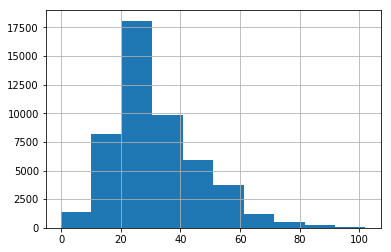

In [23]:
df['victim_age_numeric'].hist()

Plot of individual variables, or series in pandas terminology, are attributes of the data type. That is, you start wit the thing you want plotted, in this case `df['victim_age_numeric']`, and append what you want to do, such as `.hist()`. 

A second type of plots, such as scatter plots, are methods of the dataframe. 

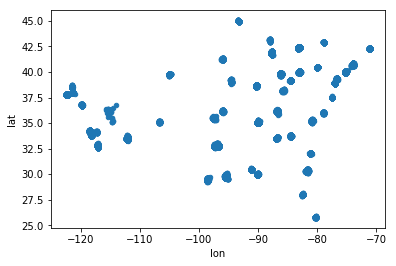

In [24]:
df.plot.scatter(x='lon', y='lat')

You could look at the other dataframe plotting methods on the helpful [pandas visualizations page](https://pandas.pydata.org/pandas-docs/stable/visualization.html). Alternatively, typing tab after `df.plot.` also reveals your options.

<img src="images/auto.png"  width="150px" align="left" /><p>






Want to know about `hexbin`? Again, the help page on the web is useful, but appending a question mark to the end of the command will bring up the documentation. 


```df.plot.hexbin?```

<img src="images/docstring.png" width = "80%" align="left"/>

A third group of plots are part of the pandas plotting library. In these cases, the thing you want plotted is the first, or only, parameter passed, as is the case with the correlation matrix. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115b39438>,
      dtype=object)

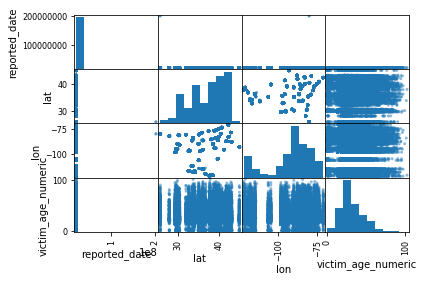

In [25]:
pd.plotting.scatter_matrix(df)

Finally, you can also create subplots using the `by` option. Note that `by` accepts a series, or dataframe column, rather than a column name. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166c6ac8>,
      dtype=object)

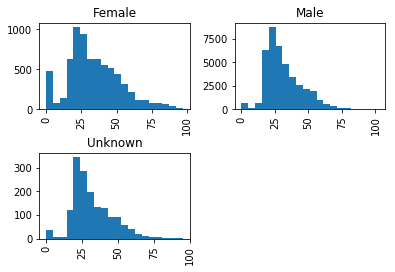

In [26]:
df['victim_age_numeric'].hist(by   = df['victim_sex'], 
                              bins = 20)

By default, `by` produces separate x and y scales for each subgraph. This is why it appears to be a relatively large number of deaths of very young females. The numbers between men and women at this age are comparable, but the very large number of male deaths in their 20s results in very different xscales for the graphs. This option can be changed with the `sharex` or `sharey` option. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a2bd470>,
      dtype=object)

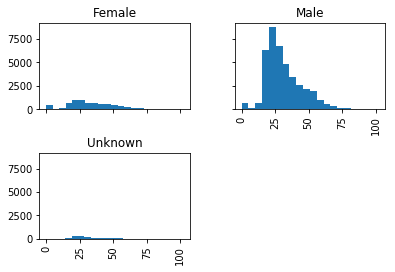

In [27]:
df['victim_age_numeric'].hist(by     = df['victim_sex'], 
                              bins   = 20,
                              sharex = True,
                              sharey = True)

<div class="alert alert-info">
<h3> Your turn</h3>
<p> A well-known data set is the list of titanic passengers. A version can be found in the data folder called, "titanic.csv". Open the file as a new dataframe <code>titanic_df</code>. How many cases? How many columns? What can you find out about the data?

</div>


In [28]:
df.hist?

#### Other descriptives

Pandas also has a method for producing crosstabs. 

In [29]:
pd.crosstab(df['victim_race'], df['disposition'])

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Asian,410,72,203
Black,15462,1496,16403
Hispanic,3332,401,3168
Other,366,30,304
Unknown,2145,320,1734
White,3959,603,1771


Note that since this is a pandas method, and not one of a specific dataframe, you need to be explicit about which datatframe each variable is coming from. That is why the first parameter is not `'victim_race'` but `df['victim_race']`. 

`normalize` can be used to display percentages instead of frequencies. A value of `index` normalized by row, `columns` by column, and `all` by all values.

In [30]:
pd.crosstab(df['victim_race'], df['disposition'], normalize='index')

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Asian,0.598540,0.105109,0.296350
Black,0.463475,0.044843,0.491682
Hispanic,0.482829,0.058108,0.459064
Other,0.522857,0.042857,0.434286
Unknown,0.510836,0.076209,0.412955
White,0.625138,0.095216,0.279646


Since this returns a dataframe, it can be saved or plotted.

In [31]:
cross_tab = pd.crosstab(df['victim_race'], df['disposition'], normalize='index')

cross_tab

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Asian,0.598540,0.105109,0.296350
Black,0.463475,0.044843,0.491682
Hispanic,0.482829,0.058108,0.459064
Other,0.522857,0.042857,0.434286
Unknown,0.510836,0.076209,0.412955
White,0.625138,0.095216,0.279646


In [32]:
cross_tab.to_csv('data/crosstab.csv')

<div class="alert alert-info">
<h3> Your turn</h3>
<p> In your titanic dataframe, run a crosstab between sex and survived. Anything interesting?

</div>


In order to highlight a meaningful characteristics of the data, you can sort before plotting. 

In [ ]:
cross_tab.sort_values(by='Closed by arrest')

In [ ]:
cross_tab.sort_values(by='Closed by arrest').plot(kind   = 'barh',
                                                  title  = 'Disposition by race')

#### Subsets

Similar to a list, a dataframe or series can be sliced to subset the data being shown. For example, `df[:2]` will return the first two rows of the dataframe. (This is identical to `df.head(2)`.)

In [ ]:
df[:2]

In [ ]:
df.head(2)

This also works for specific columns.

In [ ]:
df['reported_date'][:3]

#### Dates

A new variable can be created from `reported_date` that pandas understands is a date variable using the `to_datetime` method. The format is `%Y%m%d` because the original date is in the "YYYMMDD" format, and `coerce` places missing values where the data can be translated, rather than stopping the variable creation completely. 

In [ ]:
df['date'] = pd.to_datetime(df['reported_date'], 
                            format='%Y%m%d', 
                            errors='coerce')

In [ ]:
df['date'][:3]

From the new series, we can extract specific elements, such as the year.

In [ ]:
df['year'] = df['date'].dt.year

As before, `value_counts` and plots can give some sense of the distribution of the values.

In [ ]:
df['year'].value_counts()

Value counts returns a pandas series with an index equal to the original values, in the case the year, and the series values based on the frequency. Since years have an order, it makes sense to sort by the index before plotting them.

In [ ]:
df['year'].value_counts().sort_index(ascending = False).plot(kind='barh')

`crosstab` can also group based on more than one variable for the x or y axis. In that case, you pass a list rather than a single variable or series. To make this clearer, you can create the lists before creating the crosstab.

In [ ]:
y_vars = [df['state'], df['city']]
x_vars = df['year']

pd.crosstab(y_vars, x_vars)

Crosstab returns a dataframe with the column and index names from the values in the original dataset. Since a list was passed, the datatframe has a `MultiIndex`. The can be useful for cases where you have nested data, like cities with states or annual data on multiple countries.

In [ ]:
pd.crosstab(y_vars, x_vars).index.names

By default, the index is a series that starts with 0. If your data has unique identifiers, however, it is helpful to use that as the index, especially if you intend on merging your data with other data sources. In this dataframe, each row has a unique value for `uid`.

In [ ]:
df.set_index('uid', inplace=True)

In [ ]:
df[:5]

<div class="alert alert-info">
<h3> Your turn</h3>
<p> In your Titanic dataframe, set the index to the <code>PassengerId</code> column. Confirm that it did want you wanted it to do.

</div>


#### Subseting

You can view a subset of a dataframe based on the value of a column. 

Let's say that you wanted to look at the cases where the victim's first name was "Juan". You could create a new series which is either `True` or `False` for each case.

In [ ]:
df['victim_first'] == 'JUAN'

You could store this new true/false series. If you placed this in brackets after the name of the dataframe, pandas would display only the rows with a True value.

In [ ]:
is_juan = df['victim_first'] == 'JUAN'
df[is_juan]

More commonly, the two statements are combined.

In [ ]:
df[df['victim_first'] == 'JUAN']

With this method of subsetting, pandas doesn't return a new dataframe, but rather is just hiding some of the rows. So if you want to create a new dataframe based on this subset, you need to append `copy()` to the end. 

In [ ]:
new_df = df[df['victim_first'] == 'JUAN'].copy()

In [ ]:
new_df.head()

As this selection method returns a dataframe, it can be stored. The following creates two dataframes, one with just the 2016 and one with just the 2017 cases.

In [ ]:
df_2017 = df[df['year'] == 2017].copy()
df_2016 = df[df['year'] == 2016].copy()


df_2017['year'].value_counts()

In [ ]:
df_2016['year'].value_counts()

`value_counts` confirms that the correct cases were grabbed.

Alternatively you may want to limit your dataset by column. In this case, you create a list of the columns you want. This list is also placed in brackets after the dataframe name.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a new dataframe with just the female passengers. Check your work.

</div>


#### More subsets

In [ ]:
columns_to_keep = ['victim_last', 'victim_first', 'victim_race', 'victim_age', 'victim_sex']

In [ ]:
df[columns_to_keep]

As before, you can you use `copy` to create a new dataset.

In [ ]:
victim_df = df[columns_to_keep].copy()

In [ ]:
victim_df.head()

As with the row selection, you don't need to store the column names in a list first. By convention, these two steps are combined. However, combining the steps does create an awkward pair of double brackets.

In [ ]:
place_df = df[['city', 'state', 'lat', 'lon']].copy()

In [ ]:
place_df.head()

#### Merging

There are several different ways to combine datasets. The most straightforward is to merge two different datasets who share a key in common. To merge `place_df` with  `victim_df`, for example, you can use the datframe `merge` method. 

In [ ]:
merged_df = place_df.merge(victim_df, left_index=True, right_index=True)

merged_df.head()

### Stacking dataframes

In [ ]:
df_2016 = df[df['year'] == 2016]
len(df_2016)

In [ ]:
recent_df = pd.concat([df_2017, df_2016])

In [ ]:
len(recent_df)

In [ ]:
pd.concat([victim_df, place_df], axis = 1)

In [ ]:
df['birth_year'] = df['year'] - df['victim_age_numeric']

In [ ]:
df['birth_year'].describe()

In [ ]:
df['minor'] = df['victim_age'] <= 18

In [ ]:
df['minor'][:10]

In [ ]:
df['minor'].mean()

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a new variable in your Titanic dataframe which marks the people who paid a fare in the top 25% of all fares paid.

</div>


In [ ]:
'Back to some pandas string manipulation fun.'.title()

In [ ]:
def title_case(text):
    return text.title()

In [ ]:
title_case('JUAN')

### The apply magic

In [ ]:
df['victim_first2'] = df['victim_first'].apply(title_case)

In [ ]:
df['victim_first2'].head(10)

In [ ]:
df[['victim_first', 'victim_first2']].head(10)

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Write a function that extracts the last name from the name field on your Titanic dataframe. 
Create a new variable called <code>Family Name</code> to store the results. What is the most common family name?

</div>


Working on more than one column

In [ ]:
def victim_name(row):
    first_name = row['victim_first']
    last_name  = row['victim_last']
    name       = last_name + ', ' + first_name
    name       = title_case(name)
    return name

In [ ]:
df.apply(victim_name, axis=1)

In [ ]:
df['victim_name'] = df.apply(victim_name, axis=1)

In [ ]:
df.head()

<div class="alert alert-info">
<h3> Your turn</h3>
<p> What did we learn today? Can you use any of this on a dataset that already work on?
</div>